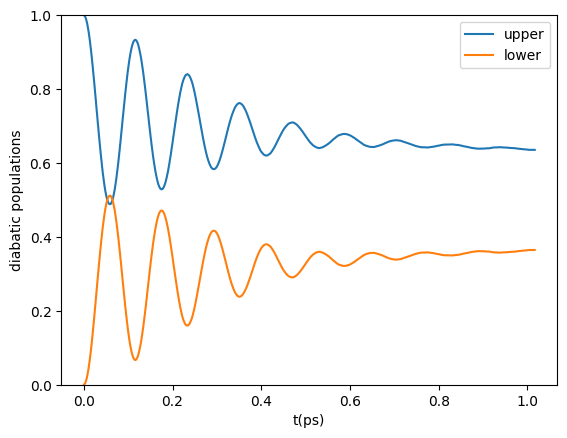

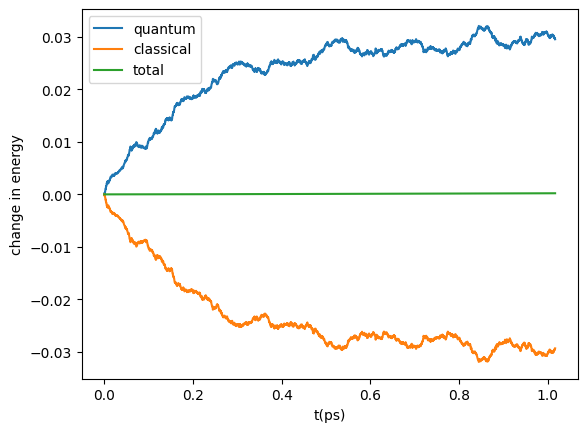

In [1]:
import qclab.simulation as simulation
import qclab.auxilliary as auxilliary
import numpy as np
import matplotlib.pyplot as plt
import glob


data_files = glob.glob('output_data/data_*.out') # get the names of all the data files

data = simulation.Data() # initialize a data class to store data
for file in data_files:
    data_n = auxilliary.load_pickle(file) # load each data file
    data.sum_data(data_n) # add data to data class

# plot as you would normally
ntraj =  len(data.seed_list)
pops = np.real(np.einsum('nii->ni',data.data_dic['dm_db']))/ntraj
t_ps = data.data_dic['t'] * 0.0260677 /ntraj
e_q = data.data_dic['e_q']/ntraj
e_c = data.data_dic['e_c']/ntraj

plt.plot(t_ps, pops[:,0], label='upper')
plt.plot(t_ps, pops[:,1], label='lower')
plt.ylabel('diabatic populations')
plt.xlabel('t(ps)')
plt.legend()
plt.ylim([0,1])
plt.show()

plt.plot(t_ps, e_q - e_q[0], label='quantum')
plt.plot(t_ps, e_c - e_c[0], label='classical')
plt.plot(t_ps, e_c - e_c[0] + e_q - e_q[0], label='total')
plt.ylabel('change in energy')
plt.xlabel('t(ps)')
plt.legend()
plt.show()